## 100 DaysOfBytewise - Machine Learning Fellowship

## 1. Predicting Diabetes Onset Using Logistic Regression
   # Dataset: 
### Diabetes Dataset   
# Preprocessing Steps:
### Handle missing values if any.
### Standardize features.
### Encode categorical variables if any.
  # Task:
### Implement logistic regression to predict diabetes onset and evaluate the model using accuracy, precision, and recall.


In [40]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Read the CSV file
data = pd.read_csv('diabetes.csv')

# Check for missing values
missing_values = pd.isna(data).sum()
# print("Missing values:\n", missing_values)

# Define the target column
target = "Outcome"
X = data.drop(columns=[target])
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)



# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Accuracy: 0.75
Precision: 0.64
Recall: 0.67


## 2. Classifying Iris Species Using Decision Trees
   ## Dataset: 
### Iris Dataset
   ## Preprocessing Steps:
## Handle missing values if any.
##  Standardize features.
###  Encode categorical variables if any.
   ## Task: 
####  Implement a decision tree classifier to classify iris species and evaluate the model using confusion matrix and accuracy.


In [39]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.tree import DecisionTreeClassifier


iris = load_iris()
X = pd.DataFrame(data=iris.data,columns=iris.feature_names)
y = pd.Series(iris.target)
# data.head()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


model = DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

# model evaluation

accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## 3. Predicting Titanic Survival Using Logistic Regression
   ## Dataset: 
### Titanic Dataset
   ## Preprocessing Steps:
### Handle missing values (e.g., fill missing ages with median).
### Encode categorical variables (e.g., one-hot encoding for embarked and gender).
### Standardize numerical features.
   ## Task:
### Implement logistic regression to predict survival on the Titanic and evaluate the model using ROC-AUC


In [32]:
import pandas as pd
import seaborn as sns
dataset = sns.load_dataset('titanic')
print(dataset.head())


# missing values
missing_values  = pd.isna(dataset).sum()
missing_values
# here we have missing values in 4 columns (age,deck,embarked,embarked_town)
# now we will handle the missing values
# first we will handle the missing values in age using median
dataset['age'] = dataset['age'].fillna(dataset['age'].median())
dataset.isnull().sum().sort_values(ascending=False)
# here we have successfully handled the missing values in the age using median
# now we will impute the embarked column using mode , because it is a catogerical variable
dataset['embark_town']=dataset['embark_town'].fillna(dataset['embark_town'].mode()[0])
dataset['embarked']=dataset['embarked'].fillna(dataset['embarked'].mode()[0])
dataset.isnull().sum().sort_values(ascending=False)
# here we have successfully imputed the missing values in the embarked and embarked_town columns
# now we have a deck column which is not important for us so , we will drop the entire column of deck
dataset = dataset.dropna(subset=['deck'])
dataset.isnull().sum().sort_values(ascending=False)
# here we have successfully dropped the deck cloumn as well

# now we have categorical values in the embarked and gender  column so we will encode using one 
# hot encoding technique
dataset = pd.get_dummies(dataset, columns=['sex', 'embarked'], drop_first=True)

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


ROC-AUC Score: 0.74
Accuracy: 0.68
Confusion Matrix:
[[66 14]
 [32 31]]


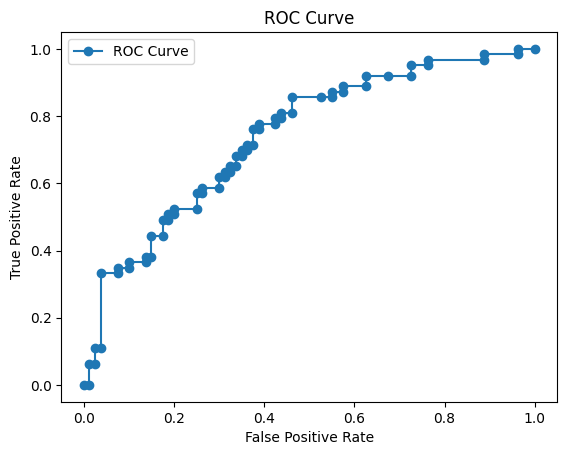

In [44]:
# Now impmeneting the logistic regression 
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score , roc_curve  ,  roc_auc_score
from sklearn.model_selection import train_test_split
dataset.head()

X = dataset[['pclass', 'age', 'sibsp', 'parch', 'fare']]
y = dataset['survived']

X ,y

X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = LogisticRegression()
model.fit(X_train,y_train)






# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  

# Model evaluation using ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Evaluate other metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, marker='o', label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### 4. Classifying Emails as Spam Using Decision Trees

## Dataset: 
### Spam Email Dataset
## Preprocessing Steps:
### Handle missing values if any.
## Standardize features.
## Encode categorical variables if present.
## Task: 
### Implement a decision tree classifier to classify emails as spam or not and evaluate the model using precision, recall, and F1-score.




In [5]:
import pandas as pd

data = pd.read_csv('spam.csv')
data.head(50)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [3]:
missing_values = pd.isnull(data).sum()
missing_values

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [4]:
print(data.columns)

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')


In [8]:
# in our dataset we will encode the text column
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


X = data['text']
y = data['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9478260869565217
   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  


In [9]:
# implementing decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_tfidf, y_train)

y_pred = clf.predict(X_test_tfidf)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print('\nClassification Report:\n', report)



Precision: 0.92
Recall: 0.92
F1-Score: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       742
           1       0.92      0.92      0.92       293

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



###  5. Predicting Customer Satisfaction Using Logistic Regression
## Dataset: 
## Customer Satisfaction Dataset
## Preprocessing Steps:
## Handle missing values (e.g., fill missing values with median).
## Encode categorical variables (e.g., one-hot encoding for region).
## Standardize numerical features.
## Task: 
#### Implement logistic regression to predict customer satisfaction and evaluate the model using accuracy and confusion matrix.


In [ ]:
import pandas as pd
customer_sat = pd.read_csv('satisfaction.csv')
customer_sat.head()



In [ ]:
missing_values = pd.isnull(customer_sat).sum()
missing_values
# as we have no missing values in our dataset

Accuracy: 0.92
Confusion Matrix:
 [[253   6]
 [ 19  22]]


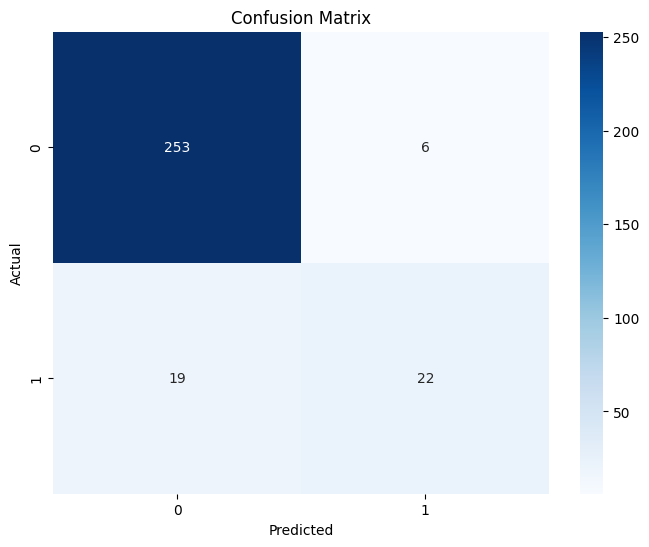


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       259
           1       0.79      0.54      0.64        41

    accuracy                           0.92       300
   macro avg       0.86      0.76      0.80       300
weighted avg       0.91      0.92      0.91       300



In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Identify the categorical and numerical columns
categorical_columns = [
'Gender', 
'VisitFrequency', 
'PreferredCuisine', 
'TimeOfVisit',
'DiningOccasion', 
'MealType'
]
numerical_columns = data.columns.difference(['CustomerID', 'HighSatisfaction'] + categorical_columns)

# Handle missing values by filling them with the median
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

# Separate features and target
X = data.drop(['CustomerID', 'HighSatisfaction'], axis=1)
y = data['HighSatisfaction']

# Apply one-hot encoding to the categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = encoder.fit_transform(X[categorical_columns])

# Convert the encoded columns to a DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Drop the original categorical columns from X
X = X.drop(categorical_columns, axis=1)

# Concatenate the encoded columns back to X
X = pd.concat([X, X_encoded_df], axis=1)

# Standardize numerical features
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
clf = LogisticRegression(random_state=42, max_iter=10000)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Evaluate the model using confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report for detailed metrics
report = classification_report(y_test, y_pred)
print('\nClassification Report:\n', report)
